In [69]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
np.set_printoptions(precision=2, sign='+', suppress=True)

In [70]:
import pandas as pd
train_data=pd.read_csv("/kaggle/input/house-pred/train.csv")
test_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
test_Id=test_data["Id"]
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
print(list(train_data.columns.difference(test_data.columns)))

['SalePrice']


In [74]:
all_data=pd.concat([train_data.assign(ind='train'),test_data.assign(ind="test")])
target=all_data[["SalePrice"]].copy()
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [75]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [76]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [77]:
all_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
ind                 0
Length: 82, dtype: int64

In [78]:
all_data.drop("Id",axis=1,inplace=True)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [79]:
train=all_data[all_data["ind"].eq("train")]
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [80]:
test=all_data[all_data["ind"].eq("test")]
test.head()	

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN,test
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN,test
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN,test
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN,test
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN,test


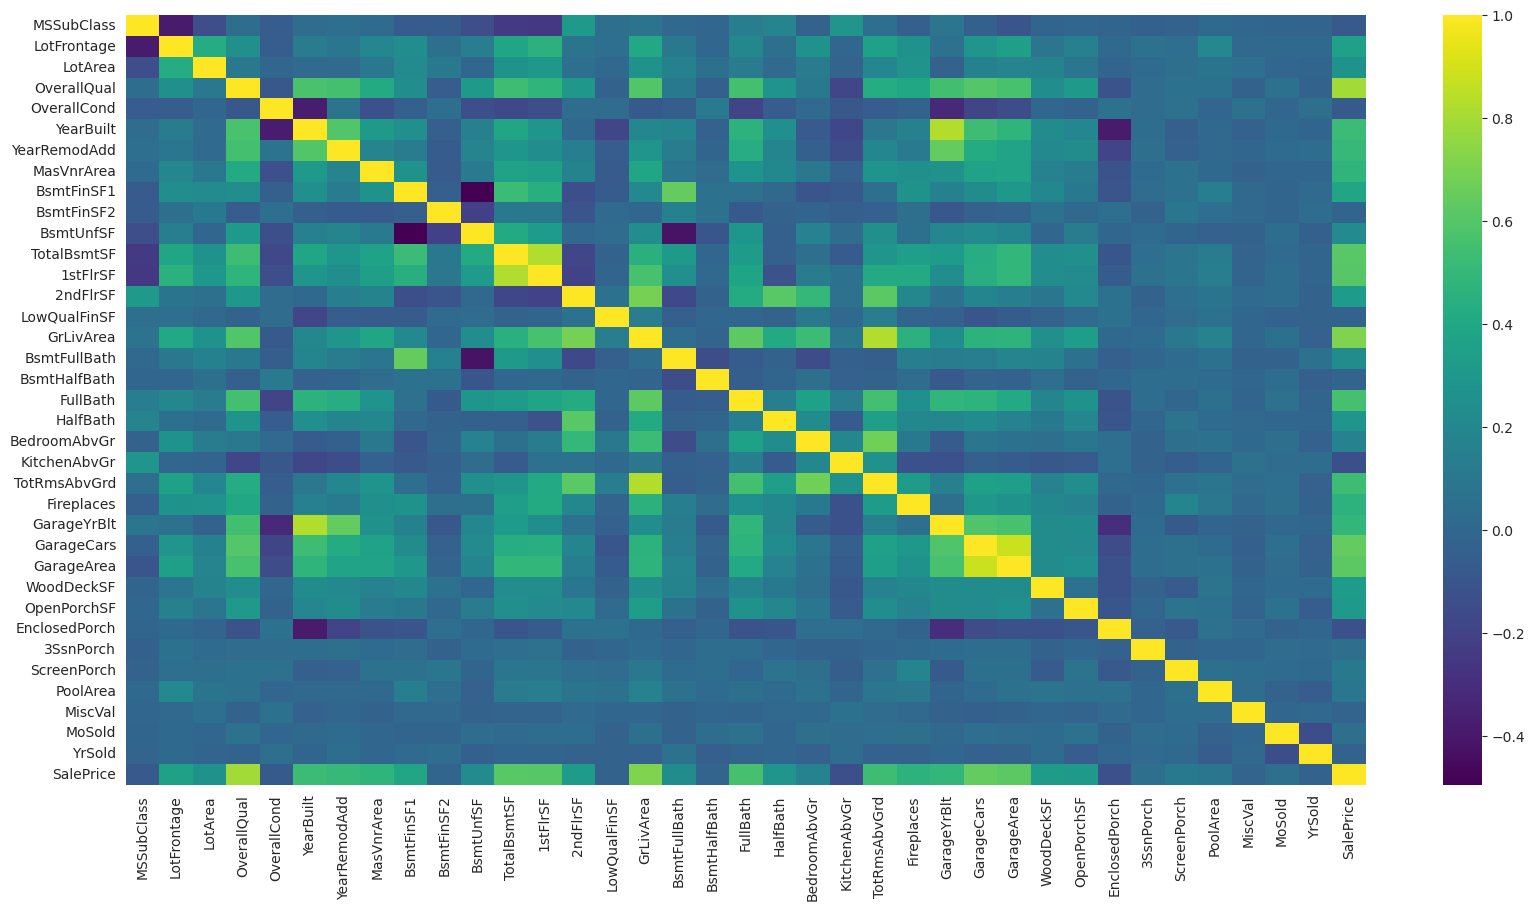

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap='viridis')
plt.show()

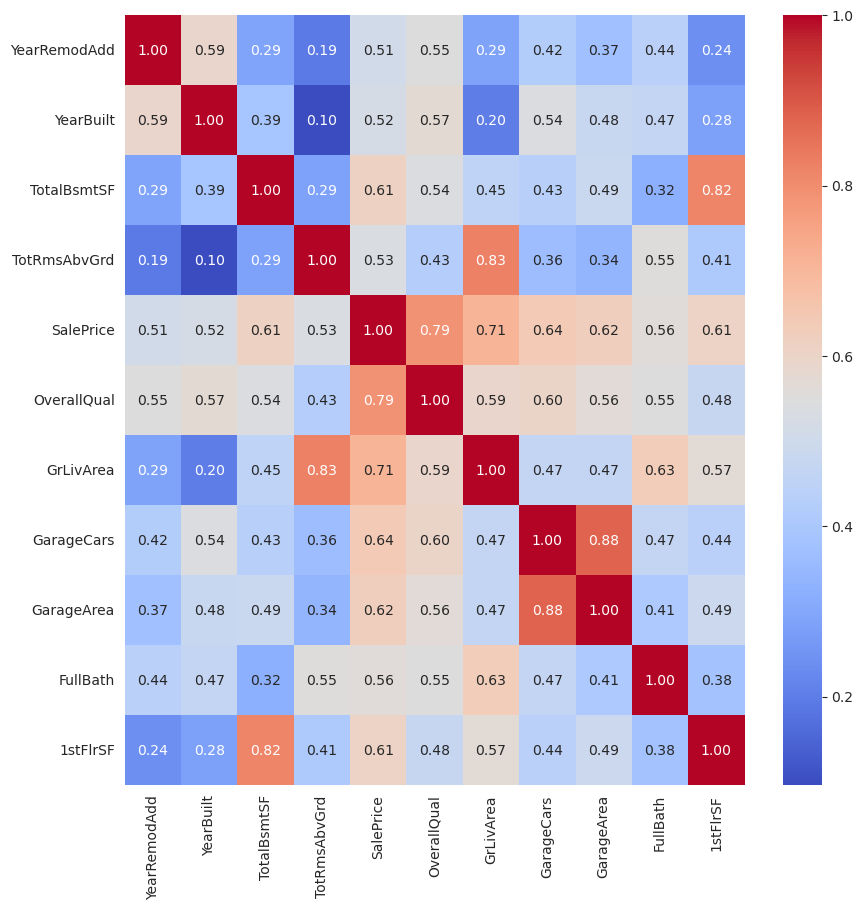

In [83]:
corr_mat=train.corr()
corr_with_target=corr_mat.index[(corr_mat['SalePrice'])>0.5]
most_corr_feature=corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(train[most_corr_feature].corr(),cmap='coolwarm',annot=True,fmt=".2f",cbar=True)
plt.show()

**the most corelated features are Overallqual,grlivarea**

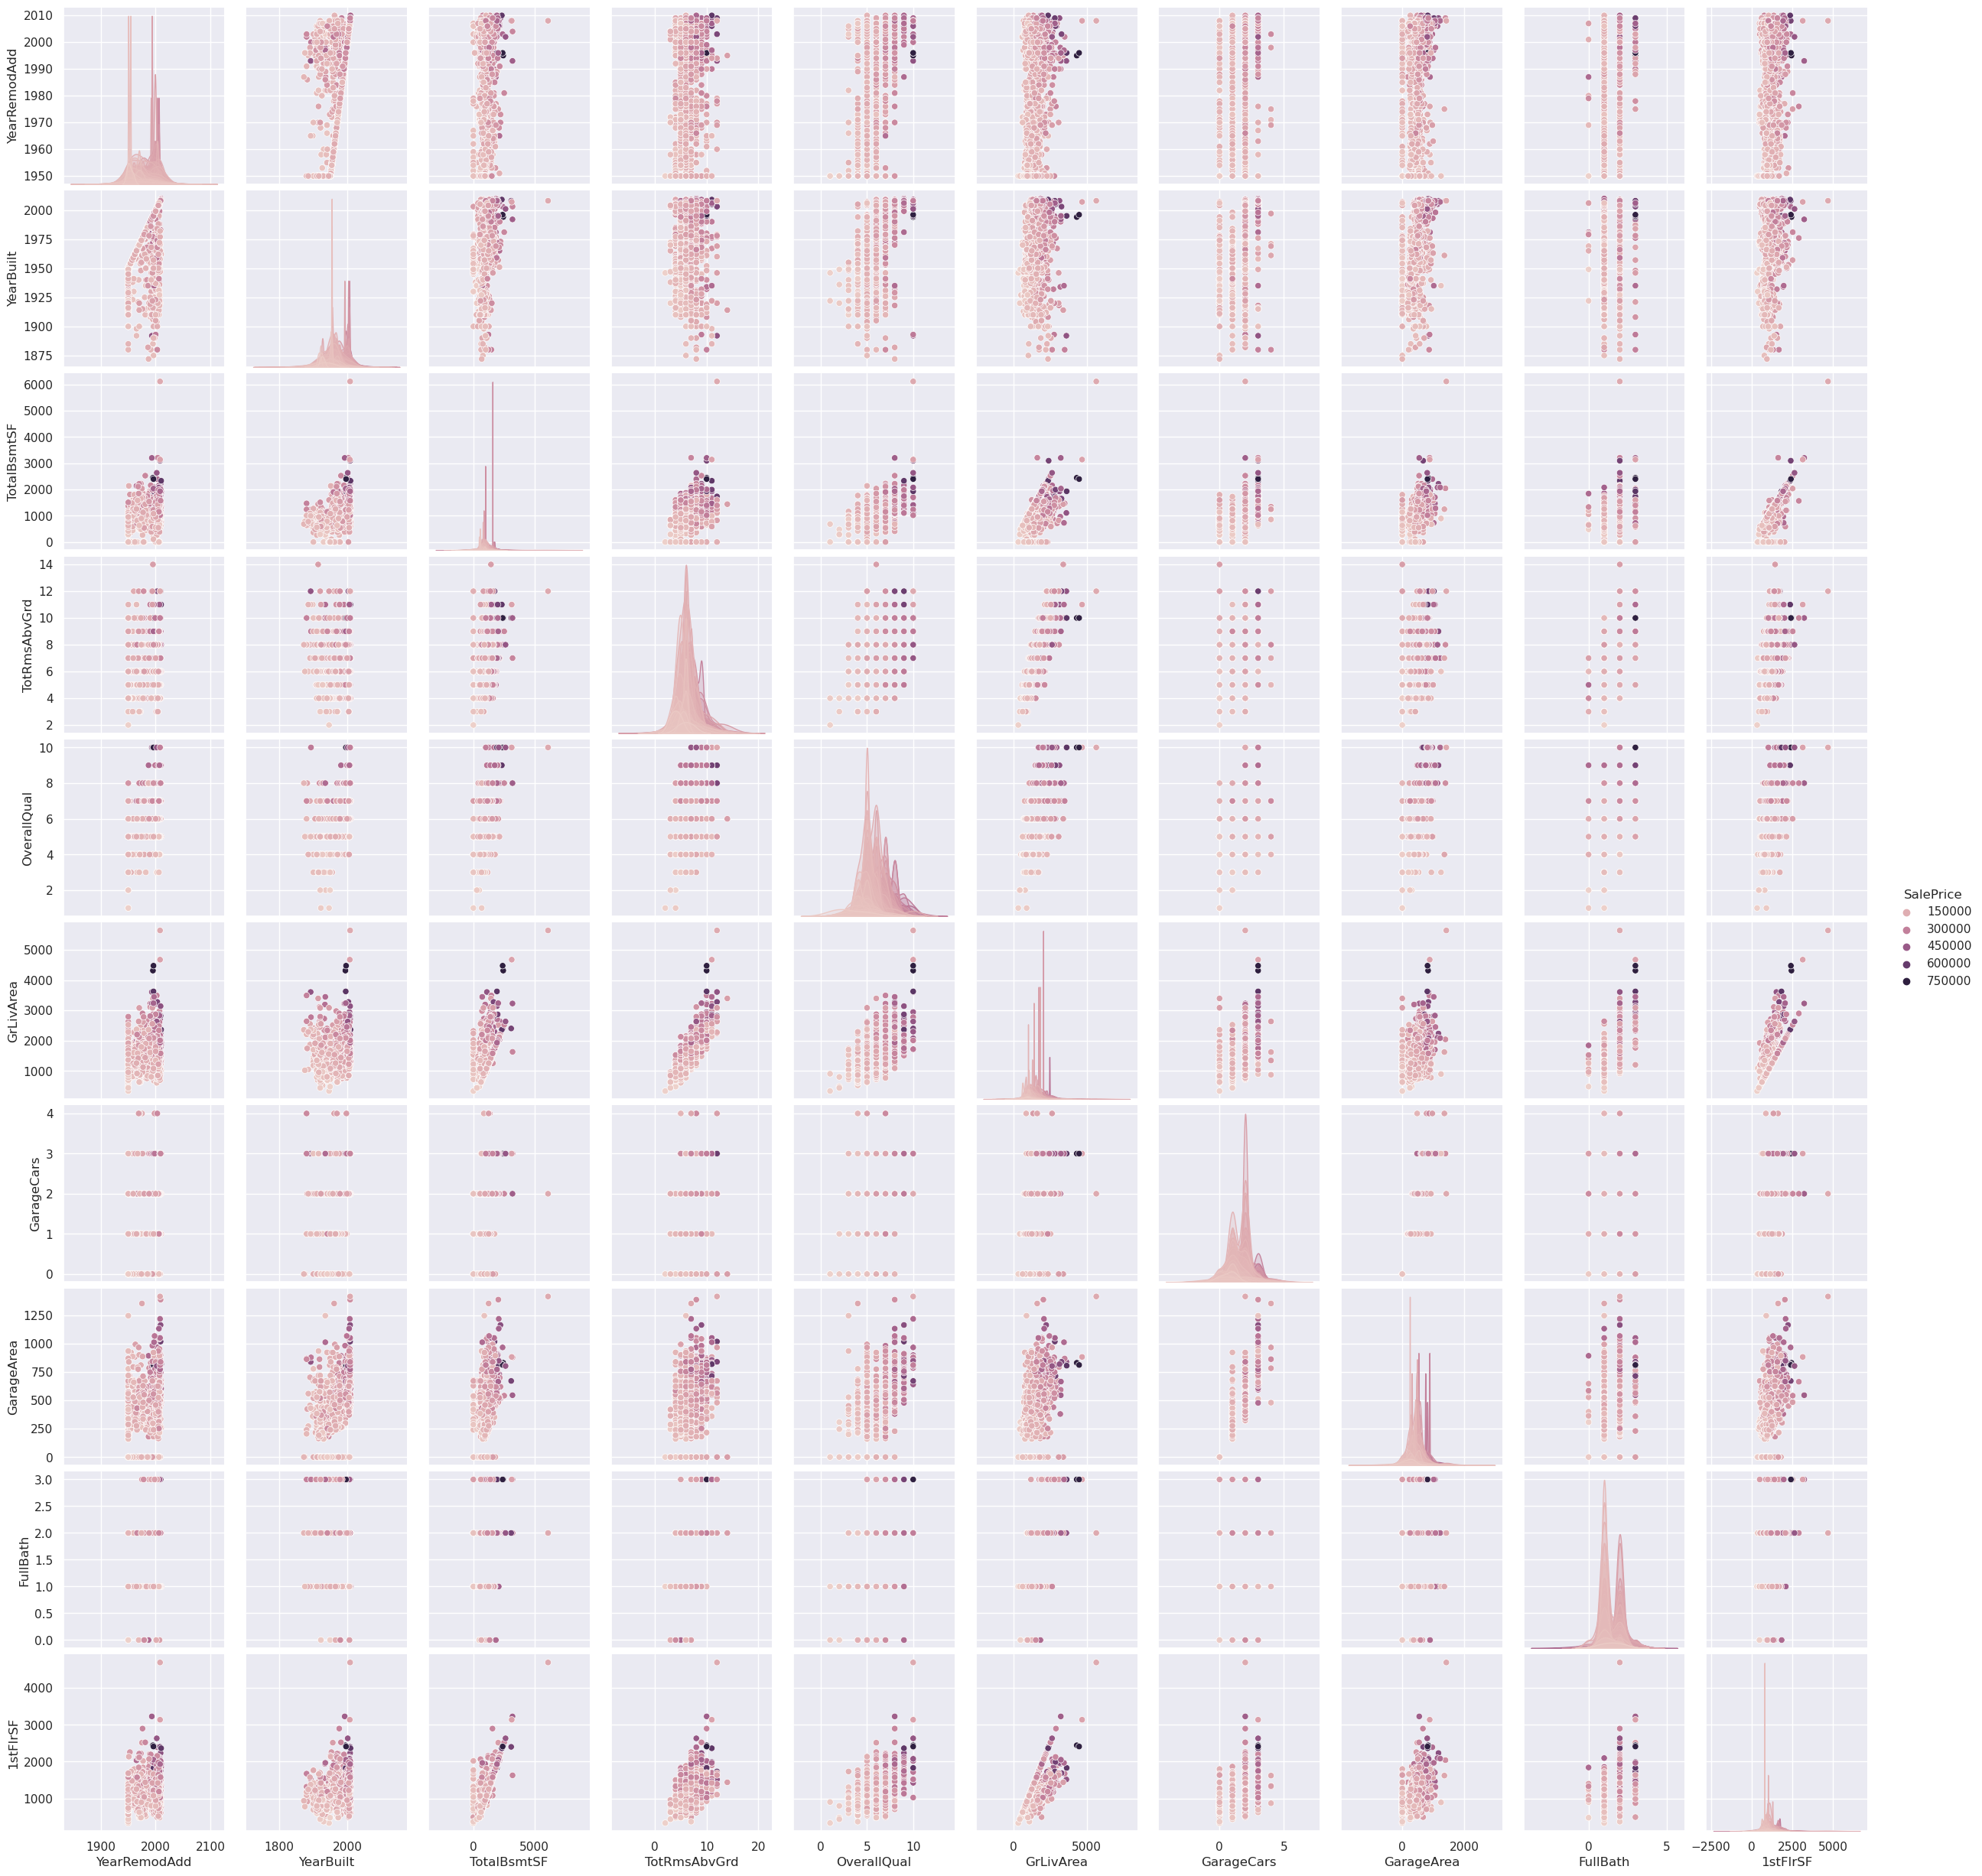

In [142]:
sns.set()
cols=['YearRemodAdd','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','FullBath','1stFlrSF']
sns.pairplot(train[cols],hue="SalePrice")

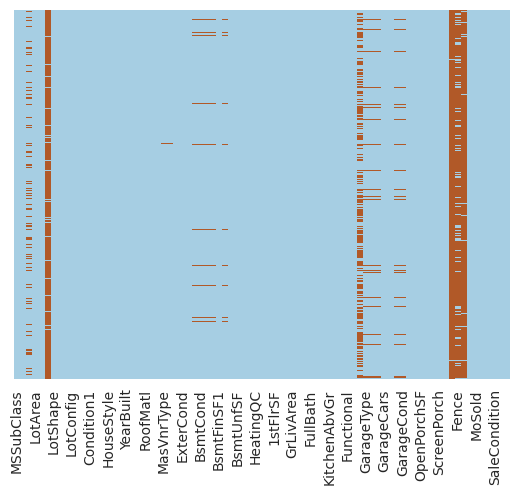

In [84]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='Paired')
plt.show()

In [85]:
imp_no_cols=list(all_data.corr()["SalePrice"][(all_data.corr()["SalePrice"]>0.5) | (all_data.corr()["SalePrice"]<-0.5)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
imp_cols=imp_no_cols+cat_cols
imp_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'MSZoning',
 'Utilities',
 'BldgType',
 'Heating',
 'KitchenQual',
 'SaleCondition',
 'LandSlope']

In [86]:
print("MISSING VALUES")
print('-'*40)
miss=all_data.isna().sum()
miss=miss[miss>0]
print(miss)
print("The columns with the missing values are",all_data.isna().sum().sum())

MISSING VALUES
----------------------------------------
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64
The columns with the missing values are 15424


In [87]:
print(all_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [88]:
target = train['SalePrice']
all_data.drop("SalePrice",axis=1,inplace = True)

<Axes: >

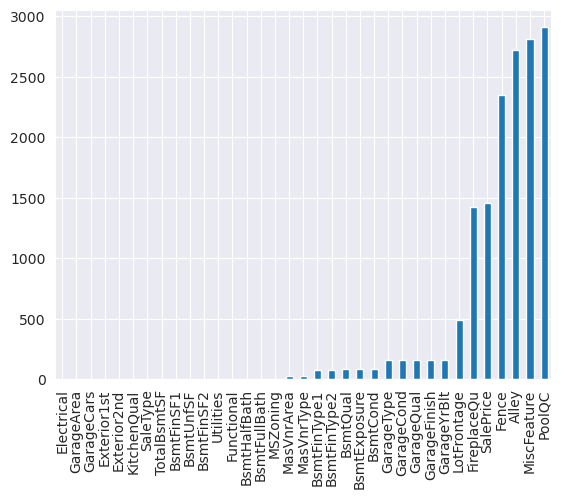

In [89]:
sns.set_style("darkgrid")
miss.sort_values(inplace=True)
miss.plot.bar()

In [90]:
all_data.shape

(2919, 80)

In [91]:
null_value=all_data.isnull().sum()
per=null_value/all_data.shape[0]*100
null_columns=per[per>40].keys()
all_data=all_data.drop(columns=null_columns)
all_data.shape
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [92]:
all_ind=all_data['ind']
all_data=all_data.drop(['ind'],axis=1)

In [93]:
all_data=pd.get_dummies(all_data)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 270 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(234)
memory usage: 1.5 MB


In [94]:
 from sklearn.impute import KNNImputer
k=KNNImputer(n_neighbors=5,weights="distance")
imp=pd.DataFrame(k.fit_transform(all_data))
imp.columns=all_data.columns
imp.index=all_data.index

In [95]:
imp

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
import numpy as np
Q1=np.percentile(all_data,25)
Q3=np.percentile(all_data,75)
Qr=Q3-Q1
lower_bound=Q1-1.5*Qr
higher_bound=Q3+1.5*Qr
outliers=imp[(imp<lower_bound) | (imp>higher_bound)]
print(outliers)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            NaN          NaN      NaN          NaN          NaN        NaN   
1            NaN          NaN      NaN          NaN          NaN        NaN   
2            NaN          NaN      NaN          NaN          NaN        NaN   
3            NaN          NaN      NaN          NaN          NaN        NaN   
4            NaN          NaN      NaN          NaN          NaN        NaN   
...          ...          ...      ...          ...          ...        ...   
1454         NaN          NaN      NaN          NaN          NaN        NaN   
1455         NaN          NaN      NaN          NaN          NaN        NaN   
1456         NaN          NaN      NaN          NaN          NaN        NaN   
1457         NaN          NaN      NaN          NaN          NaN        NaN   
1458         NaN          NaN      NaN          NaN          NaN        NaN   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [97]:
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()
srs=pd.DataFrame(rs.fit_transform(imp))
srs.columns=imp.columns
srs.index=imp.index
srs.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067331,-0.221652,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.523138,0.581107,-0.293079,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.873616,0.441719,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572582,1.178256,-0.293079,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.067331,-0.088978,0.137197,0.646183,-0.507284,0.980221,0.848965,0.333064,0.098120,-0.293079,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.302568,-0.442775,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572582,-0.494637,-0.293079,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.067331,0.618618,0.518903,1.355551,-0.507284,0.947203,0.753229,1.384062,0.469142,-0.293079,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [98]:
srs['ind']=all_ind

In [99]:
x_train,x_test=srs[srs['ind'].eq('train')],srs[srs['ind'].eq('test')]
x_train.drop(['ind'],axis=1,inplace=True)
x_test.drop(['ind'],axis=1,inplace=True)
y_train=list(target)

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor

r2_score_list = []
rmse_score_list = []
testing_values = []

def model_prediction(model):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    r2 = r2_score(y_train,y_train_pred)*100
    rmse = mean_squared_error(y_train, y_train_pred, squared=False)

    r2_score_list.append(r2)
    rmse_score_list.append(rmse)
    testing_values.append(y_test_pred)
    
    print(f"r2_Score of {model} ",r2)
    print(f"{model} ",rmse)

model_prediction(HuberRegressor())
model_prediction(RandomForestRegressor())
model_prediction(ElasticNet())


r2_Score of HuberRegressor()  92.02548552310796
HuberRegressor()  22426.229481695183
r2_Score of RandomForestRegressor()  98.03070614032514
RandomForestRegressor()  11144.469496299924
r2_Score of ElasticNet()  91.11818813043617
ElasticNet()  23667.638183009534


In [107]:
sub=pd.DataFrame({'Id':test_Id,'SalePrice':testing_values[1]})
sub.to_csv("house-pred submission.csv",index=False)